In [79]:
if (!require("lubridate")) install.packages("lubridate")
if (!require("dplyr")) install.packages("dplyr")
if (!require("ggplot2")) install.packages("ggplot2")
if (!require("formattable")) install.packages("formattable")
if (!require("Hmisc")) install.packages('Hmisc')
if (!require("tidyr")) install.packages("tidyr")
library('rfm')

In [80]:
options(scipen = 20)

In [81]:
getwd()

[1] "c:/Users/dkestenbaum/Documents/GitHub/marketing_datamart/gambeling_analysis"

In [82]:
data = load('DataGroupAssignment.Rdata')

In [83]:
data

[1] "Demographics"         "UserDailyAggregation" "PokerChipConversions"

# data cleaning 

In [84]:
head(Demographics)

UserID,Country,Language,RegDate,FirstPay,FirstAct,FirstSp,FirstCa,FirstGa,FirstPo,ApplicationID,Gender
1324354,276,2,2005-02-01,20050224,20050224,20050224,NULL,NULL,NULL,3,1
1324355,300,8,2005-02-01,20050201,20050201,20050201,NULL,NULL,20050611,1,1
1324356,276,2,2005-02-01,20050201,20050202,20050202,NULL,NULL,NULL,3,1
1324358,752,1,2005-02-01,20050201,20050201,20050201,NULL,NULL,NULL,1,1
1324360,792,7,2005-02-01,20050202,20050202,20050202,20050203,NULL,NULL,9,1
1324362,276,2,2005-02-01,20050211,20050211,20050211,NULL,NULL,NULL,3,1


In [85]:
#check tibble feature types
str(Demographics)

Classes 'tbl_df', 'tbl' and 'data.frame':	42649 obs. of  12 variables:
 $ UserID       : num  1324354 1324355 1324356 1324358 1324360 ...
  ..- attr(*, "label")= chr "User ID"
 $ Country      : num  276 300 276 752 792 276 208 276 620 792 ...
  ..- attr(*, "label")= chr "Country of residence"
 $ Language     : num  2 8 2 1 7 2 11 2 16 7 ...
  ..- attr(*, "label")= chr "Primary language"
 $ RegDate      : chr  "2005-02-01" "2005-02-01" "2005-02-01" "2005-02-01" ...
  ..- attr(*, "label")= chr "Registration Date"
 $ FirstPay     : chr  "20050224" "20050201" "20050201" "20050201" ...
  ..- attr(*, "label")= chr "First Payin Date"
 $ FirstAct     : chr  "20050224" "20050201" "20050202" "20050201" ...
  ..- attr(*, "label")= chr "First Active Play Date"
 $ FirstSp      : chr  "20050224" "20050201" "20050202" "20050201" ...
  ..- attr(*, "label")= chr "First Sports Book Play Date"
 $ FirstCa      : chr  "NULL" "NULL" "NULL" "NULL" ...
  ..- attr(*, "label")= chr "First Casino Play Date"
 $ F

In [86]:
#convert registration date to date time 
Demographics$RegDate <- as.Date(Demographics$RegDate)

In [87]:
str(Demographics$RegDate)

 Date[1:42649], format: "2005-02-01" "2005-02-01" "2005-02-01" "2005-02-01" "2005-02-01" ...


In [88]:
#convert first pay, first act, first sports book play, first casino play,
# first games play, and  first poker play dates to datetime.
Demographics$FirstPay <- as.Date(Demographics$FirstPay, "%Y%m%d")

In [89]:
Demographics$FirstAct <- as.Date(Demographics$FirstAct, "%Y%m%d")
Demographics$FirstSp <- as.Date(Demographics$FirstSp, "%Y%m%d")
Demographics$FirstCa <- as.Date(Demographics$FirstCa, "%Y%m%d")
Demographics$FirstGa <- as.Date(Demographics$FirstGa, "%Y%m%d")
Demographics$FirstPo <- as.Date(Demographics$FirstPo, "%Y%m%d")

In [90]:
str(Demographics)

Classes 'tbl_df', 'tbl' and 'data.frame':	42649 obs. of  12 variables:
 $ UserID       : num  1324354 1324355 1324356 1324358 1324360 ...
  ..- attr(*, "label")= chr "User ID"
 $ Country      : num  276 300 276 752 792 276 208 276 620 792 ...
  ..- attr(*, "label")= chr "Country of residence"
 $ Language     : num  2 8 2 1 7 2 11 2 16 7 ...
  ..- attr(*, "label")= chr "Primary language"
 $ RegDate      : Date, format: "2005-02-01" "2005-02-01" ...
 $ FirstPay     : Date, format: "2005-02-24" "2005-02-01" ...
 $ FirstAct     : Date, format: "2005-02-24" "2005-02-01" ...
 $ FirstSp      : Date, format: "2005-02-24" "2005-02-01" ...
 $ FirstCa      : Date, format: NA NA ...
 $ FirstGa      : Date, format: NA NA ...
 $ FirstPo      : Date, format: NA "2005-06-11" ...
 $ ApplicationID: num  3 1 3 1 9 3 1 3 1 9 ...
  ..- attr(*, "label")= chr "Application ID"
 $ Gender       : num  1 1 1 1 1 1 1 1 1 1 ...


In [91]:
#create a cutoff date object
october <- as.Date("20051002","%Y%m%d")

In [92]:
#calculate LOR (Length of Relation) based on time since 
#last transaction date in the dataset and the registration date of the 
#gambler
Demographics$LOR <- october - Demographics$RegDate

In [93]:
#calculate play to act interval (PTAI)
#based on time from FirstPay (first betting deposit date)
#and first active date
Demographics$PTAI <- Demographics$FirstAct - Demographics$FirstPay

In [94]:
#calculate registeration to first pay interval (RTFP)
#based on time from gambler registration date to first bet deposit
Demographics$RTFP <- Demographics$FirstPay - Demographics$RegDate

In [95]:
#calculate dummy variable for each first play category (sports book, casino play,
#first games play, first poker play) which indicates whether the indiviual
#has ever partook in these play categories
Demographics$SpPlayed <- ifelse(is.na(Demographics$FirstSp),1,0)

Demographics$CaPlayed <- ifelse(is.na(Demographics$FirstCa),1,0)

Demographics$GaPlayed <- ifelse(is.na(Demographics$FirstGa),1,0)
Demographics$PoPlayed <- ifelse(is.na(Demographics$FirstPo),1,0)

In [96]:
sapply(Demographics,function(x) sum(is.na(x)))

UserID       Country      Language       RegDate      FirstPay 
            0             0             0             0             0 
     FirstAct       FirstSp       FirstCa       FirstGa       FirstPo 
            2          1236         36761         39376         40507 
ApplicationID        Gender           LOR          PTAI          RTFP 
            0             1             0             2             0 
     SpPlayed      CaPlayed      GaPlayed      PoPlayed 
            0             0             0             0

In [97]:
table(Demographics$Gender)


    0     1 
 3588 39060 

In [98]:
Demographics$Gender <- ifelse(is.na(Demographics$Gender),1, Demographics$Gender)

In [99]:
sum(is.na(Demographics$Gender))

[1] 0

In [100]:
head(Demographics)

UserID,Country,Language,RegDate,FirstPay,FirstAct,FirstSp,FirstCa,FirstGa,FirstPo,ApplicationID,Gender,LOR,PTAI,RTFP,SpPlayed,CaPlayed,GaPlayed,PoPlayed
1324354,276,2,2005-02-01,2005-02-24,2005-02-24,2005-02-24,NA,NA,NA,3,1,243 days,0 days,23 days,0,1,1,1
1324355,300,8,2005-02-01,2005-02-01,2005-02-01,2005-02-01,NA,NA,2005-06-11,1,1,243 days,0 days,0 days,0,1,1,0
1324356,276,2,2005-02-01,2005-02-01,2005-02-02,2005-02-02,NA,NA,NA,3,1,243 days,1 days,0 days,0,1,1,1
1324358,752,1,2005-02-01,2005-02-01,2005-02-01,2005-02-01,NA,NA,NA,1,1,243 days,0 days,0 days,0,1,1,1
1324360,792,7,2005-02-01,2005-02-02,2005-02-02,2005-02-02,2005-02-03,NA,NA,9,1,243 days,0 days,1 days,0,0,1,1
1324362,276,2,2005-02-01,2005-02-11,2005-02-11,2005-02-11,NA,NA,NA,3,1,243 days,0 days,10 days,0,1,1,1


In [101]:
UserDailyAggregation$Date <- as.Date(UserDailyAggregation$Date,"%Y%m%d")

In [102]:
sum(is.na(UserDailyAggregation))

[1] 0

In [103]:
head(UserDailyAggregation)

UserID,Date,ProductID,Stakes,Winnings,Bets
1324354,2005-02-24,1,20,0,2
1324354,2005-02-25,1,0,0,0
1324354,2005-02-27,1,20,0,2
1324354,2005-03-03,1,10,0,1
1324354,2005-03-04,1,10,0,1
1324354,2005-03-05,1,10,0,1


In [104]:
#Filter out transactions before first paydate
Demographics_paydate <- Demographics %>%
  select(UserID,FirstPay)

uda_filtered <- left_join(UserDailyAggregation,Demographics_paydate,by = 'UserID')

uda_filtered <- uda_filtered %>%
  filter(Date >= FirstPay) %>%
        select(-FirstPay)

In [105]:
UserDailyAggregation_1 <- uda_filtered %>% 
        group_by(UserID) %>% 
        summarise(first_txn_dt=min(Date),
                  last_txn_dt=max(Date), 
                  txn_cnt=n(), 
                  total_stakes=round(sum(Stakes)), 
                  total_wins=round(sum(Winnings)), 
                  total_bets=round(sum(Bets)), 
                  avg_stakes=round(mean(Stakes)), 
                  avg_wins=round(mean(Winnings)), 
                  avg_bets=round(mean(Bets)))

In [106]:
head(UserDailyAggregation_1)

UserID,first_txn_dt,last_txn_dt,txn_cnt,total_stakes,total_wins,total_bets,avg_stakes,avg_wins,avg_bets
1324354,2005-02-24,2005-09-30,136,11977,11737,279,88,86,2
1324355,2005-02-01,2005-09-29,106,426,464,252,4,4,2
1324356,2005-02-02,2005-09-12,75,1365,911,214,18,12,3
1324358,2005-02-01,2005-05-06,9,336,210,11,37,23,1
1324360,2005-02-02,2005-09-25,32,66,43,47,2,1,1
1324362,2005-02-11,2005-09-17,7,22,0,7,3,0,1


In [107]:
p_id <- unique(UserDailyAggregation[c("ProductID")])
p_id[order(p_id$ProductID),]

ProductID
1
2
4
5
6
7
8


In [108]:
# Making a new dataframe with number of transactions per UserID in the given period
UserDailyAggregation_2 <- uda_filtered %>% 
                group_by(UserID) %>% 
                summarise(procuct_1_cnt=length(ProductID[ProductID == 1]),
                product_2_cnt=length(ProductID[ProductID == 2]),
                product_4_cnt=length(ProductID[ProductID == 4]),
                product_5_cnt=length(ProductID[ProductID == 5]),
                product_6_cnt=length(ProductID[ProductID == 6]),
                product_7_cnt=length(ProductID[ProductID == 7]),
                product_8_cnt=length(ProductID[ProductID == 8])
                )

In [109]:
head(UserDailyAggregation_2)

UserID,procuct_1_cnt,product_2_cnt,product_4_cnt,product_5_cnt,product_6_cnt,product_7_cnt,product_8_cnt
1324354,117,19,0,0,0,0,0
1324355,99,7,0,0,0,0,0
1324356,51,24,0,0,0,0,0
1324358,8,1,0,0,0,0,0
1324360,29,2,0,0,0,0,1
1324362,7,0,0,0,0,0,0


In [110]:
sapply(UserDailyAggregation_1,function(x) sum(is.na(x)))

UserID first_txn_dt  last_txn_dt      txn_cnt total_stakes   total_wins 
           0            0            0            0            0            0 
  total_bets   avg_stakes     avg_wins     avg_bets 
           0            0            0            0

In [111]:
head(UserDailyAggregation)

UserID,Date,ProductID,Stakes,Winnings,Bets
1324354,2005-02-24,1,20,0,2
1324354,2005-02-25,1,0,0,0
1324354,2005-02-27,1,20,0,2
1324354,2005-03-03,1,10,0,1
1324354,2005-03-04,1,10,0,1
1324354,2005-03-05,1,10,0,1


In [112]:
uda_cleaned <- merge(x = UserDailyAggregation_1, y = UserDailyAggregation_2, by = "UserID", all.x = TRUE)

In [113]:
head(uda_cleaned)

UserID,first_txn_dt,last_txn_dt,txn_cnt,total_stakes,total_wins,total_bets,avg_stakes,avg_wins,avg_bets,procuct_1_cnt,product_2_cnt,product_4_cnt,product_5_cnt,product_6_cnt,product_7_cnt,product_8_cnt
1324354,2005-02-24,2005-09-30,136,11977,11737,279,88,86,2,117,19,0,0,0,0,0
1324355,2005-02-01,2005-09-29,106,426,464,252,4,4,2,99,7,0,0,0,0,0
1324356,2005-02-02,2005-09-12,75,1365,911,214,18,12,3,51,24,0,0,0,0,0
1324358,2005-02-01,2005-05-06,9,336,210,11,37,23,1,8,1,0,0,0,0,0
1324360,2005-02-02,2005-09-25,32,66,43,47,2,1,1,29,2,0,0,0,0,1
1324362,2005-02-11,2005-09-17,7,22,0,7,3,0,1,7,0,0,0,0,0,0


In [114]:
names(uda_cleaned)

[1] "UserID"        "first_txn_dt"  "last_txn_dt"   "txn_cnt"      
 [5] "total_stakes"  "total_wins"    "total_bets"    "avg_stakes"   
 [9] "avg_wins"      "avg_bets"      "procuct_1_cnt" "product_2_cnt"
[13] "product_4_cnt" "product_5_cnt" "product_6_cnt" "product_7_cnt"
[17] "product_8_cnt"

In [115]:
#Calculate Recency, Frequency and Monetary Value
#Get max date

#calculate recency and frequency
UserDailyAggregation_rfm <- uda_filtered %>% 
  group_by(UserID) %>% 
  summarise(recency = as.numeric(october - max(Date)),
            frequency = n(),
            monetary_value = sum(Winnings))

#Fill na with 0s
UserDailyAggregation_rfm[is.na(UserDailyAggregation_rfm)] = 0

#calculate RFM Score
UserDailyAggregation_rfm <- UserDailyAggregation_rfm %>%
  mutate(rfm_value = recency + frequency + monetary_value)


uda_cleaned <- left_join(uda_cleaned,UserDailyAggregation_rfm,by='UserID')

UserDailyAggregation_rfm <- UserDailyAggregation_rfm %>%
  mutate(recency_score = as.numeric(cut2(-recency, g=4)),
         frequency_score = as.numeric(cut2(frequency, g=4)),
         value_score = as.numeric(cut2(monetary_value, g=4)))
UserDailyAggregation_rfm <- UserDailyAggregation_rfm %>%
  mutate(recency_score = recency_score *0.2,
         frequency_score = frequency_score *0.2,
         value_score = value_score *0.6)

UserDailyAggregation_rfm$weighted_score <- rowMeans(UserDailyAggregation_rfm[,c("recency_score","frequency_score","value_score")])



Warning message:
"Column `UserID` has different attributes on LHS and RHS of join"

In [116]:
uda_cleaned$profit <- uda_cleaned$total_stakes - uda_cleaned$total_wins

In [117]:
PokerChipConversions_buy <- PokerChipConversions %>% 
                          group_by(UserID) %>% 
                            filter(TransType == 124) %>% 
                            summarise(total_buy = sum(TransAmount),
                                      avg_buy = mean(TransAmount),
                                      min_buy = min(TransAmount),
                                      max_buy = max(TransAmount))

PokerChipConversions_sell <- PokerChipConversions %>% 
                                group_by(UserID) %>% 
                                filter(TransType == 24) %>% 
                                summarise(total_sell = sum(TransAmount),
                                          avg_sell = mean(TransAmount),
                                          min_sell = min(TransAmount),
                                          max_sell = max(TransAmount))

PokerChipConversions_2 <- full_join(x=PokerChipConversions_buy,y=PokerChipConversions_sell, by='UserID')

In [127]:
PokerChipConversions$Date <- as.POSIXlt(strptime(PokerChipConversions$TransDateTime, format = "%Y-%m-%d %H:%M:%S",tz="UTC"))
PokerChipConversions$Date <- as.Date(PokerChipConversions$Date)
PokerChipConversions_3 <- PokerChipConversions %>%
group_by(UserID,Date) %>%
filter(TransType == 24) %>%
dplyr::summarise(total_sell = sum(TransAmount))
uda_poker_table <- full_join(PokerChipConversions_3,uda_filtered,by=c('UserID','Date'),all.y=TRUE)
uda_poker_table[is.na(uda_poker_table)] = 0
uda_poker_table$total_amount = uda_poker_table$Winnings + uda_poker_table$total_sell
UserDailyAggregation_rfm_c <- rfm_table_order(data = uda_poker_table,customer_id = UserID,order_date = Date,revenue = total_amount,analysis_date = october )
UserDailyAggregation_rfm_2 <- UserDailyAggregation_rfm_c$rfm
names(UserDailyAggregation_rfm_2)[1] <- 'UserID'

In [128]:
base_table <- merge(x= Demographics,y=uda_cleaned,by='UserID',all.x=TRUE)
base_table <- left_join(base_table,PokerChipConversions_2,by='UserID')
base_table <- left_join(base_table,UserDailyAggregation_rfm_2,by='UserID')

Warning message:
"Column `UserID` has different attributes on LHS and RHS of join"Warning message:
"Column `UserID` has different attributes on LHS and RHS of join"

In [205]:
base_table <- base_table %>%
mutate(w_recency_score = recency_score *0.2,
w_frequency_score = frequency_score *0.2,
w_monetary_score = monetary_score *0.6)
base_table$weighted_rfm <- rowMeans(base_table[,c("w_recency_score","w_frequency_score","w_monetary_score")])
base_table$Loyality <- ifelse(base_table$weighted_rfm > 1.6, 'Loyalists',
ifelse((base_table$weighted_rfm <= 1.6) & (base_table$weighted_rfm > 1.3),'Potential Loyalists',
ifelse((base_table$weighted_rfm <= 1.3) & (base_table$weighted_rfm > 0.7),'Regular Customers',
ifelse((base_table$weighted_rfm <= 0.7) & (base_table$weighted_rfm > 0.4),'Hesitant Customers','Needs Attention'
))))

In [206]:
head(base_table)

UserID,Country,Language,RegDate,FirstPay,FirstAct,FirstSp,FirstCa,FirstGa,FirstPo,...,amount,recency_score,frequency_score,monetary_score,rfm_score,w_recency_score,w_frequency_score,w_monetary_score,weighted_rfm,Loyality
1324354,276,2,2005-02-01,2005-02-24,2005-02-24,2005-02-24,NA,NA,NA,...,11736.6100,5,5,5,555,1.0,1.0,3.0,1.6666667,Loyalists
1324355,300,8,2005-02-01,2005-02-01,2005-02-01,2005-02-01,NA,NA,2005-06-11,...,472.7593,5,5,4,554,1.0,1.0,2.4,1.4666667,Potential Loyalists
1324356,276,2,2005-02-01,2005-02-01,2005-02-02,2005-02-02,NA,NA,NA,...,910.6600,4,5,4,454,0.8,1.0,2.4,1.4000000,Potential Loyalists
1324358,752,1,2005-02-01,2005-02-01,2005-02-01,2005-02-01,NA,NA,NA,...,209.8575,2,2,3,223,0.4,0.4,1.8,0.8666667,Regular Customers
1324360,792,7,2005-02-01,2005-02-02,2005-02-02,2005-02-02,2005-02-03,NA,NA,...,43.1573,4,3,2,432,0.8,0.6,1.2,0.8666667,Regular Customers
1324362,276,2,2005-02-01,2005-02-11,2005-02-11,2005-02-11,NA,NA,NA,...,0.0000,4,2,1,421,0.8,0.4,0.6,0.6000000,Hesitant Customers


In [207]:
colnames(base_table)

[1] "UserID"            "Country"           "Language"         
 [4] "RegDate"           "FirstPay"          "FirstAct"         
 [7] "FirstSp"           "FirstCa"           "FirstGa"          
[10] "FirstPo"           "ApplicationID"     "Gender"           
[13] "LOR"               "PTAI"              "RTFP"             
[16] "SpPlayed"          "CaPlayed"          "GaPlayed"         
[19] "PoPlayed"          "first_txn_dt"      "last_txn_dt"      
[22] "txn_cnt"           "total_stakes"      "total_wins"       
[25] "total_bets"        "avg_stakes"        "avg_wins"         
[28] "avg_bets"          "procuct_1_cnt"     "product_2_cnt"    
[31] "product_4_cnt"     "product_5_cnt"     "product_6_cnt"    
[34] "product_7_cnt"     "product_8_cnt"     "recency"          
[37] "frequency"         "monetary_value"    "rfm_value"        
[40] "profit"            "total_buy"         "avg_buy"          
[43] "min_buy"           "max_buy"           "total_sell"       
[46] "avg_sell"          "min_sell"          "max_sell"         
[49] "date_most_recent"  "recency_days"      "transaction_count"
[52] "amount"            "recency_score"     "frequency_score"  
[55] "monetary_score"    "rfm_score"         "w_recency_score"  
[58] "w_frequency_score" "w_monetary_score"  "weighted_rfm"     
[61] "Loyality"

In [132]:
sapply(base_table,function(x) sum(is.na(x)))

UserID           Country          Language           RegDate 
                0                 0                 0                 0 
         FirstPay          FirstAct           FirstSp           FirstCa 
                0                 2              1236             36761 
          FirstGa           FirstPo     ApplicationID            Gender 
            39376             40507                 0                 0 
              LOR              PTAI              RTFP          SpPlayed 
                0                 2                 0                 0 
         CaPlayed          GaPlayed          PoPlayed      first_txn_dt 
                0                 0                 0               444 
      last_txn_dt           txn_cnt      total_stakes        total_wins 
              444               444               444               444 
       total_bets        avg_stakes          avg_wins          avg_bets 
              444               444               444               444 
    procuct_1_cnt     product_2_cnt     product_4_cnt     product_5_cnt 
              444               444               444               444 
    product_6_cnt     product_7_cnt     product_8_cnt           recency 
              444               444               444               444 
        frequency    monetary_value         rfm_value            profit 
              444               444               444               444 
        total_buy           avg_buy           min_buy           max_buy 
            40264             40264             40264             40264 
       total_sell          avg_sell          min_sell          max_sell 
            40296             40296             40296             40296 
 date_most_recent      recency_days transaction_count            amount 
               37                37                37                37 
    recency_score   frequency_score    monetary_score         rfm_score 
               37                37                37                37 
  w_recency_score w_frequency_score  w_monetary_score      weighted_rfm 
               37                37                37                37

In [133]:
# creat function impute NA values with 0 in columns which are numeric
numeric_col_na_to_0 <- function(x) { replace(x, is.na(x), 0) }

In [141]:
base_table$txn_cnt <- numeric_col_na_to_0(base_table$txn_cnt)
base_table$total_stakes <- numeric_col_na_to_0(base_table$total_stakes)
base_table$total_wins <- numeric_col_na_to_0(base_table$total_wins)
base_table$total_bets <- numeric_col_na_to_0(base_table$total_bets)
base_table$avg_stakes <- numeric_col_na_to_0(base_table$avg_stakes)
base_table$avg_wins <- numeric_col_na_to_0(base_table$avg_wins)
base_table$avg_bets <- numeric_col_na_to_0(base_table$avg_bets)
base_table$procuct_1_cnt <- numeric_col_na_to_0(base_table$procuct_1_cnt)
base_table$product_2_cnt <- numeric_col_na_to_0(base_table$product_2_cnt)
base_table$product_4_cnt <- numeric_col_na_to_0(base_table$product_4_cnt)
base_table$product_5_cnt <- numeric_col_na_to_0(base_table$product_5_cnt)
base_table$product_6_cnt <- numeric_col_na_to_0(base_table$product_6_cnt)
base_table$product_7_cnt <- numeric_col_na_to_0(base_table$product_7_cnt)
base_table$product_8_cnt <- numeric_col_na_to_0(base_table$product_8_cnt)
base_table$recency <- numeric_col_na_to_0(base_table$recency)
base_table$frequency <- numeric_col_na_to_0(base_table$frequency)
base_table$monetary_value <- numeric_col_na_to_0(base_table$monetary_value)
base_table$rfm_value <- numeric_col_na_to_0(base_table$rfm_value)
base_table$recency_score <- numeric_col_na_to_0(base_table$recency_score)
base_table$frequency_score <- numeric_col_na_to_0(base_table$frequency_score)
base_table$monetary_score <- numeric_col_na_to_0(base_table$monetary_score)
base_table$rfm_score <- numeric_col_na_to_0(base_table$rfm_score)
base_table$profit <- numeric_col_na_to_0(base_table$profit)
base_table$total_buy <- numeric_col_na_to_0(base_table$total_buy)
base_table$avg_buy <- numeric_col_na_to_0(base_table$avg_buy)
base_table$min_buy <- numeric_col_na_to_0(base_table$min_buy)
base_table$max_buy <- numeric_col_na_to_0(base_table$max_buy)
base_table$total_sell <- numeric_col_na_to_0(base_table$total_sell)
base_table$avg_sell <- numeric_col_na_to_0(base_table$avg_sell)
base_table$min_sell <- numeric_col_na_to_0(base_table$min_sell)
base_table$max_sell <- numeric_col_na_to_0(base_table$max_sell)
base_table$recency_days <- numeric_col_na_to_0(base_table$recency_days)
base_table$transaction_count <- numeric_col_na_to_0(base_table$transaction_count)
base_table$amount <- numeric_col_na_to_0(base_table$amount)
base_table$w_recency_score <- numeric_col_na_to_0(base_table$w_recency_score)
base_table$w_frequency_score <- numeric_col_na_to_0(base_table$w_frequency_score)
base_table$w_monetary_score <- numeric_col_na_to_0(base_table$w_monetary_score)
base_table$weighted_rfm <- numeric_col_na_to_0(base_table$weighted_rfm)








In [142]:
sapply(base_table,function(x) sum(is.na(x)))

UserID           Country          Language           RegDate 
                0                 0                 0                 0 
         FirstPay          FirstAct           FirstSp           FirstCa 
                0                 2              1236             36761 
          FirstGa           FirstPo     ApplicationID            Gender 
            39376             40507                 0                 0 
              LOR              PTAI              RTFP          SpPlayed 
                0                 2                 0                 0 
         CaPlayed          GaPlayed          PoPlayed      first_txn_dt 
                0                 0                 0               444 
      last_txn_dt           txn_cnt      total_stakes        total_wins 
              444                 0                 0                 0 
       total_bets        avg_stakes          avg_wins          avg_bets 
                0                 0                 0                 0 
    procuct_1_cnt     product_2_cnt     product_4_cnt     product_5_cnt 
                0                 0                 0                 0 
    product_6_cnt     product_7_cnt     product_8_cnt           recency 
                0                 0                 0                 0 
        frequency    monetary_value         rfm_value            profit 
                0                 0                 0                 0 
        total_buy           avg_buy           min_buy           max_buy 
                0                 0                 0                 0 
       total_sell          avg_sell          min_sell          max_sell 
                0                 0                 0                 0 
 date_most_recent      recency_days transaction_count            amount 
               37                 0                 0                 0 
    recency_score   frequency_score    monetary_score         rfm_score 
                0                 0                 0                 0 
  w_recency_score w_frequency_score  w_monetary_score      weighted_rfm 
                0                 0                 0                 0

In [167]:
#create plot that visualizes monetary value (gambler' winnings), frequency, and recency
scatter_plot_monetary_value <- ggplot(base_table, aes(x=frequency,y=monetary_value,color=recency)) + 
ggtitle('Gambler total winnings against frequency') + 
xlab('Frequency (days)') + 
ylab('Total winnings (Euros)') + 
#create annotation for most extreme outlier, displaying their ID
annotate(geom='text',x = 175, y= 1070000, label='Gambler ID with highest winnings',color='blue')

In [168]:
#code adapted and inspired from this forum thread: https://stackoverflow.com/questions/1923273/counting-the-number-of-elements-with-the-values-of-x-in-a-vector
scatter_plot_monetary_value_1 <- lapply(base_table[1], function(data) scatter_plot_monetary_value +
geom_jitter(alpha=0.5) + 
theme_light(base_size=11) + 
theme(plot.title = element_text(hjust = 0.5)) + 
geom_text(aes(label= ifelse(base_table$monetary_value > quantile(base_table$monetary_value, 0.9999999),as.character(base_table$UserID),'')),hjust=0,vjust=0))

$UserID


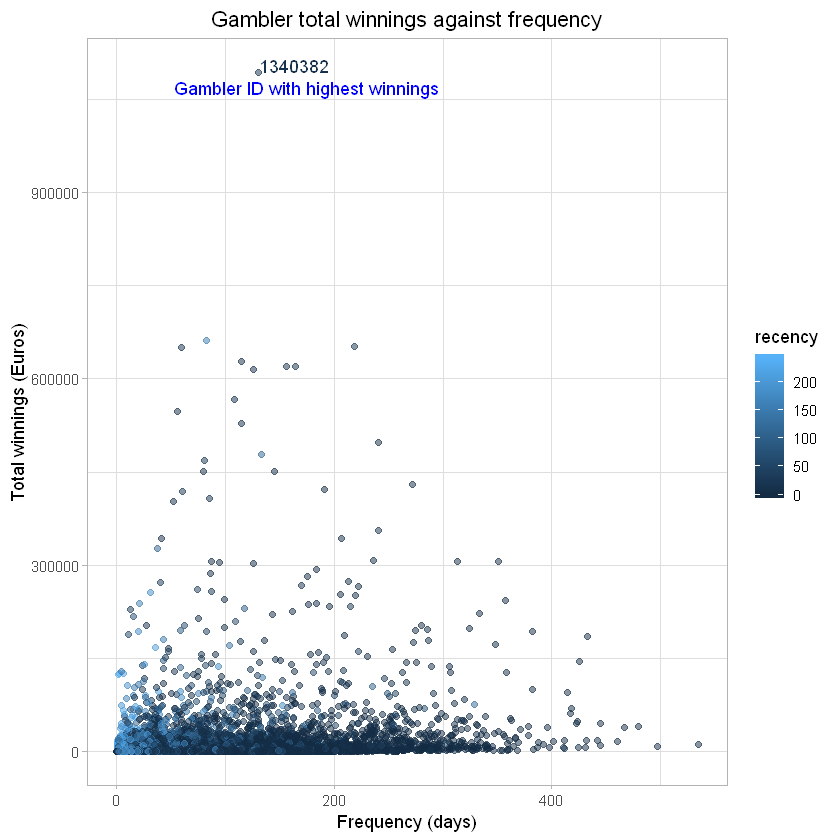

In [165]:
scatter_plot_monetary_value_1

In [197]:
prod_counts = c(sum(base_table$procuct_1_cnt),sum(base_table$product_2_cnt),sum(base_table$product_4_cnt),sum(base_table$product_5_cnt),sum(base_table$product_6_cnt),sum(base_table$product_7_cnt),sum(base_table$product_8_cnt))

In [199]:
df_product_counts <- data.frame(
    products = as.factor(c('Prod_1','Prod_2','Prod_4','Prod_5','Prod_6','Prod_7','Prod_8')),
    counts = prod_counts
)

In [260]:
#create a barchart displaying most popular products excluding poker 
bar_plots_products <- ggplot(df_product_counts,aes(x=products,y=counts, fill=products)) +
geom_col(position='dodge') +
ggtitle('Product count (usage) against product type') + 
theme_light(base_size=11) +
theme(plot.title = element_text(hjust = 0.5)) +
ylab('Count (times played)') + 
scale_x_discrete('Product type',labels=c('Sports book fixed-odd','Sports book live-action','Casino BossMedia','Supertoto','Games VS','Games bwin','Casino Chartwell')) +
theme(axis.text.x = element_text(angle = 90)) +
scale_fill_discrete(labels=c('Sports book fixed-odd','Sports book live-action','Casino BossMedia','Supertoto','Games VS','Games bwin','Casino Chartwell'))


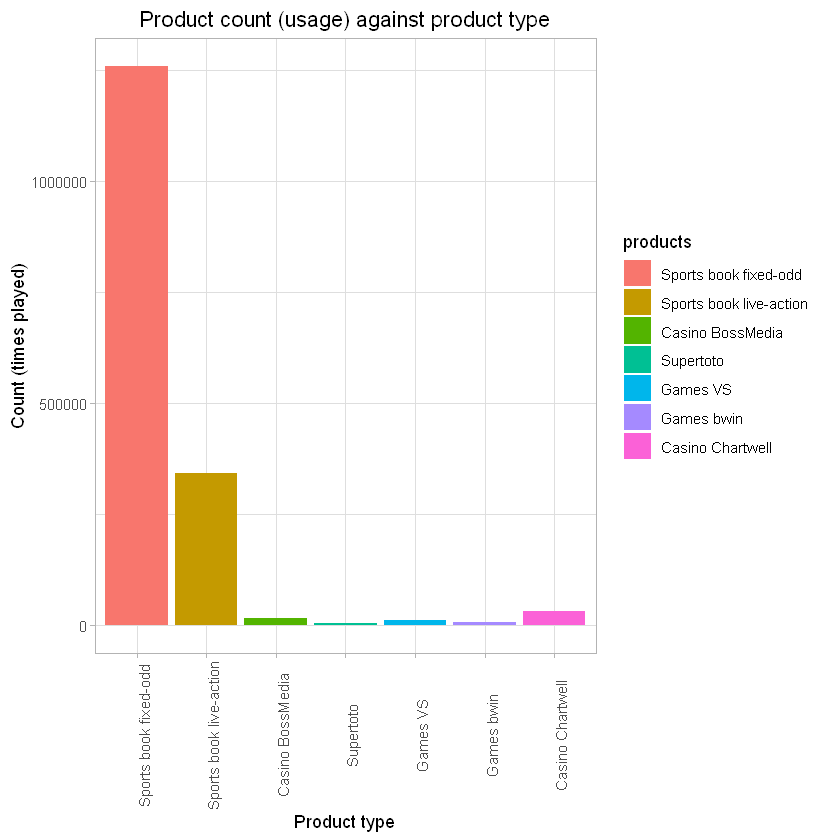

In [261]:
bar_plots_products